In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data.csv')
print(df.head())

   id category    item            variety        date  price unit
0   1    fruit  apples  bramleys_seedling  11-03-2022   2.05   kg
1   2    fruit  apples  coxs_orange_group  11-03-2022   1.22   kg
2   3    fruit  apples    egremont_russet  11-03-2022   1.14   kg
3   4    fruit  apples           braeburn  11-03-2022   1.05   kg
4   5    fruit  apples               gala  11-03-2022   1.03   kg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9647 entries, 0 to 9646
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9647 non-null   int64  
 1   category  9647 non-null   object 
 2   item      9647 non-null   object 
 3   variety   9647 non-null   object 
 4   date      9647 non-null   object 
 5   price     9647 non-null   float64
 6   unit      9647 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 527.7+ KB


In [4]:
#skewness and Kurtosis
print("Skewness: %f" %df['price'].skew())
print("Kurtosis: %f" %df['price'].kurt())

Skewness: 3.225828
Kurtosis: 12.416190


In [5]:
df['item'].nunique()

54

In [6]:
le = preprocessing.LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df['item'] = le.fit_transform(df['item'])
df['variety']=le.fit_transform(df['variety'])
df.head()

id  category  item  variety        date  price unit
0   1         1     1       12  11-03-2022   2.05   kg
1   2         1     1       26  11-03-2022   1.22   kg
2   3         1     1       32  11-03-2022   1.14   kg
3   4         1     1       11  11-03-2022   1.05   kg
4   5         1     1       35  11-03-2022   1.03   kg

In [7]:
features=['category','item','variety']
X=df[features]
y=df[['price']]
print(X.head())
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
dtree = DecisionTreeRegressor(max_depth=15)
dtree.fit(X, y)

   category  item  variety
0         1     1       12
1         1     1       26
2         1     1       32
3         1     1       11
4         1     1       35
   price
0   2.05
1   1.22
2   1.14
3   1.05
4   1.03
(7717, 3) (7717, 1)
(1930, 3) (1930, 1)


DecisionTreeRegressor(max_depth=15)

In [8]:
predictions = dtree.predict(X_test)
print(predictions)
print(type(predictions))

[0.72018349 1.16       0.21103093 ... 1.16185185 0.72018349 4.88782609]
<class 'numpy.ndarray'>


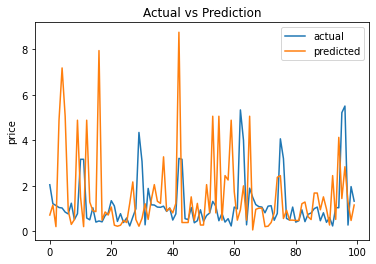

In [9]:
import matplotlib.pyplot as plt

plt.plot(y[:100],label='actual')
plt.plot(predictions[:100],label='predicted')
plt.legend()
plt.title('Actual vs Prediction')
plt.ylabel('price')
plt.savefig('result.png')
plt.show()


In [10]:
y_score = dtree.score(X_test,y_test)
print('Accuracy: ', y_score)

Accuracy:  0.8678489708668551


In [11]:
from sklearn.metrics import *
mse = mean_squared_error(y_test,predictions)
mse

0.5263557920697117

In [34]:
import numpy as np
data = {
    'actual':np.concatenate(np.array(y[:100]).tolist()).flat,
    'predicted':predictions[:100].tolist()
    }
# print(data['actual'][:10])
# print(data['predicted'][:10])
df = pd.DataFrame(data)
print(df.head())

   actual  predicted
0    2.05   0.720183
1    1.22   1.160000
2    1.14   0.211031
3    1.05   4.887826
4    1.03   7.184643


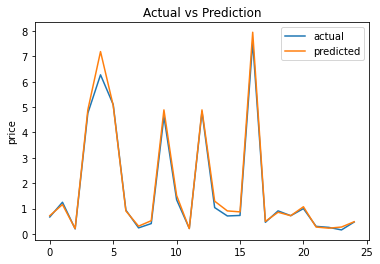

In [39]:
from matplotlib import pyplot as plt
data = {
        'actual':np.concatenate(np.array(y_test[:25]).tolist()).flat,
        'predicted':predictions[:25].tolist()
        }

plt.plot(data['actual'],label='actual')
plt.plot(data['predicted'],label='predicted')
plt.legend()
plt.title('Actual vs Prediction')
plt.ylabel('price')
#plt.yticks([])
plt.savefig('login/static/results/result.jpg')
plt.show()